# Data Science Project: Assessment 3

ID: 201488745

Name: Arafat Hussain ( In collaboration with : Amal Bose )

This assessment has a 60% weight.

## Case study

The Bitsbank historical transactions dataset provides information on transactions that occurred within a 48-hour timeframe. Principal component analysis has previously been performed in order to preserve the data's anonymity and decrease its dimensionality. This dataset contains 31 features, one of which is the class feature. Except for the amount, time, and class columns, all of these 31 fields have been scaled and standardised. The transaction's class label indicates whether it is legitimate or fraudulent. The dataset is heavily skewed, with fraud accounting for only 0.172 percent of all transactions (492 frauds out of 284,807 transactions).

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives

We aim to develop a prediction model that can effectively detect fraudulent credit card transactions through this research, which will be based on historical data from Bitsbank transactions.

The requirements are mentioned as below - 

a) A non-fraudulent transaction will cost the bank £1000 if the prediction model labels it as fraudulent. The bank's budget is £20,000 for £100 million in non-fraudulent transactions, with a limit of 20 transactions per £100 million.

b) If the prediction model incorrectly identifies a fraudulent transaction as non-fraudulent, the bank will lose £10,000. The bank will only allow a budget of £50k for £200k of fraudulent transactions, i.e. a maximum of 5 incorrect predictions every £200k of illegal transactions.



100-200 words

###  b) Plan
Please demonstrate how you have conducted the project with a simple Gantt chart.

## 2. Understanding the case study (4 marks)

###  Case study analysis
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

200-300 words

1. The bank's historical data is unbalanced, with fraudulent transactions accounting for just 0.172 percent of all transactions (492 frauds out of 284,807 transactions). 
2. As a consequence of PCA transformation, all variables in the supplied dataset have just numerical values. 
3. The 'Class' column determines whether the transaction is legitimate or fraudulent.'1' indicates a fraudulent transaction, while a '0' indicates a regular transaction. 
4. The dataset has no null values, and only 'time' and 'amount' must be scaled.
5. This is a binary classification project with a highly imbalanced dataset, and to meet the bank's requirements, we'll use machine learning techniques such as KNN, Random Forest, ADA Boost, SVM and Decision tree.


## 3. Pre-processing applied (20 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


Loading the libraries:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

Loading the Dataset:

In [3]:
data = pd.read_excel("creditcard.xlsx")


Getting the numerical summary and distribution of variables

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758743e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252298e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.636929e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316157e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.591952e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247354e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050180e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.693344e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179712e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


###  a) Preparing the labels appropriately

In [78]:

fraudulent_transactions=data[data['Class']==1]
normal_transactions=data[data['Class']==0]

length1 = len(fraudulent_transactions)
length2 = len(normal_transactions)

# Checking the class distribution

print("Number of fraudalent transactions:",length1,"\nNumber of normal transactions:", length2)

Number of fraudalent transactions: 460 
Number of normal transactions: 282493


###  b) Removing synonymous and noisy attributes

Suppose that we have a dataset in which we have some measured attributes. Now, these attributes might carry some random error or variance. Such errors in attribute values are called as noise in the data.

If such errors persist in our data, it will return inaccurate results.

In [6]:
# dropping  duplicate values
length1 = len(data)
data.drop_duplicates(subset =None,
                     keep = False, inplace = True)
length2 = len(data)
length3 = length1-length2
print("Dimension of data before removing duplicates:",length1,"\nDimension of data after removing duplicates:", length2,"\nNo of duplicates:", length3)

Dimension of data before removing duplicates: 284807 
Dimension of data after removing duplicates: 282953 
No of duplicates: 1854


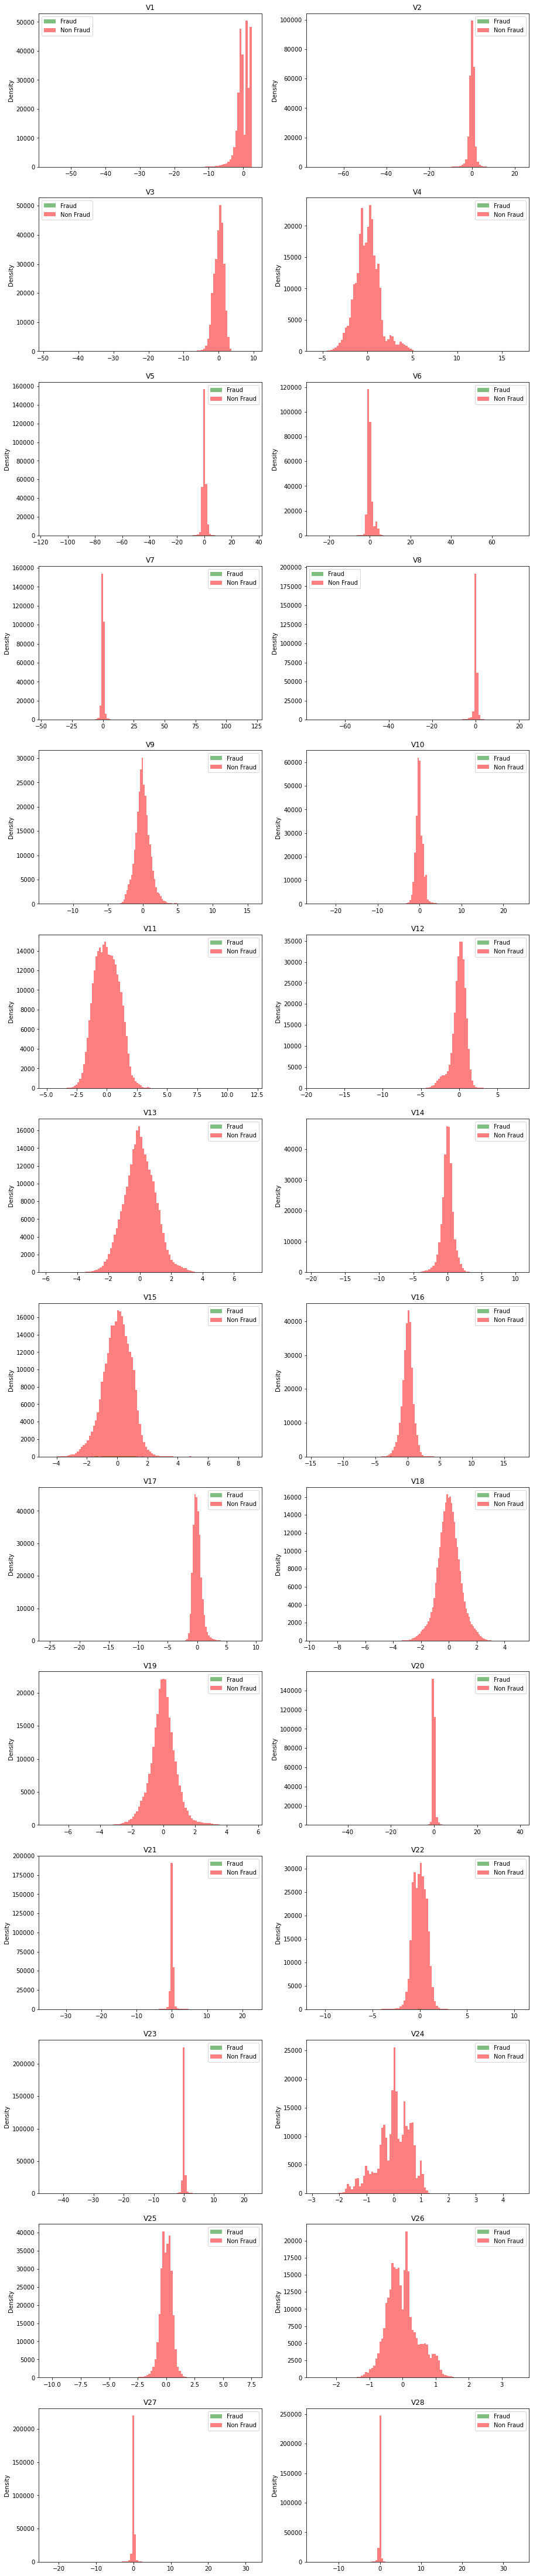

In [7]:
#checking the distribution of 'V' variables to check its relevance
columns = data.iloc[:,1:29].columns

frauds = data.Class == 1
normals = data.Class == 0


grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(columns):
    ax = plt.subplot(grid[n])
    x1 = data.loc[data.Class==1, col]
    x2 = data.loc[data.Class==0, col]
    ax.hist(x1, bins = 100,alpha = 0.5, color='g',label = 'Fraud') #Will receive the "semi-salmon" violin
    ax.hist(x2, bins = 100,alpha = 0.5, color='r',label = 'Non Fraud') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    ax.legend();
plt.show()

We analysed the distribution of time and 'v' variables to find its relation with the target variable and found the significant ones. Also we did correlation analysis to explore the relation between them . Based on that we are selecting only those attributes which are significant.

In [10]:
#based on the analysis of distribution of variables, we are chosing only those attributes which are significant
data = data[["V1","V2","V3","V4","V7","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

###  c) Dealing with missing values


Apparently there are no missing values in the dataset. 

In [11]:
pd.DataFrame(data.isnull().sum())

,0
V1,0
V2,0
V3,0
V4,0
V7,0
V9,0
V10,0
V11,0
V12,0
V14,0


###  d) Handling Imbalance in the data:

In [82]:
length1 = len(fraudulent_transactions)
length2 = len(normal_transactions)

# Checking the class distribution

print("Number of fraudalent transactions:",length1,"\nNumber of normal transactions:", length2)

Number of fraudalent transactions: 460 
Number of normal transactions: 282493


Since there is severe imbalance in the data, we are doing undersampling to build an efficient predictive model

In [14]:
# Creating Test and Train datasets

X = data.drop('Class',axis=1)
y = data['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
## Oversampled data

y_train.reset_index(drop=True,inplace=True)
x_train.reset_index(drop=True,inplace=True)

data_train = pd.concat([x_train, y_train], axis=1)


class_count_0, class_count_1 = data_train["Class"].value_counts()

# Separate class
class_0 = data_train[data_train["Class"] == 0]
class_1 = data_train[data_train["Class"] == 1]

class_0_under = class_1.sample(class_count_0,replace = True)
data_train = pd.concat([class_0_under, class_0], axis=0)
                       
x_train_oversampled = data_train.drop('Class',axis=1)
y_train_oversampled = data_train['Class']


In [16]:
# #Undersampling of the data:


y_train.reset_index(drop=True,inplace=True)
x_train.reset_index(drop=True,inplace=True)

data_train = pd.concat([x_train, y_train], axis=1)


class_count_0, class_count_1 = data_train["Class"].value_counts()

# Separate class
class_0 = data_train[data_train["Class"] == 0]
class_1 = data_train[data_train["Class"] == 1]

class_0_under = class_0.sample(class_count_1)
data_train = pd.concat([class_0_under, class_1], axis=0)
                       
x_train = data_train.drop('Class',axis=1)
y_train = data_train['Class']


In [ ]:
# #Undersampling of the data:
# class_count_0, class_count_1 = data["Class"].value_counts()

# # Separate class
# class_0 = data[data["Class"] == 0]
# class_1 = data[data["Class"] == 1]

# class_0_under = class_0.sample(class_count_1)
# data = pd.concat([class_0_under, class_1], axis=0)

# data["Class"].value_counts().plot(kind='bar', title='count (target)')
# plt.show()



###  d) Rescaling if necessary


In [25]:
#To clearly the data of frauds and no frauds
df_fraud = data[data['Class'] == 1]
df_normal = data[data['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     460.000000
mean      124.045239
std       262.620752
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    282493.000000
mean         88.476932
std         250.543853
min           0.000000
25%           5.640000
50%          22.000000
75%          77.600000
max       25691.160000
Name: Amount, dtype: float64


In [26]:
#rescaling the amount column and dropping the non scaled column after that.

from sklearn.preprocessing import  RobustScaler
robust=RobustScaler()
x_train['amount']=robust.fit_transform(x_train['Amount'].values.reshape(-1,1))

x_train.drop(['Amount'], axis=1, inplace=True)

x_train_oversampled['amount']=robust.fit_transform(x_train_oversampled['Amount'].values.reshape(-1,1))

x_train_oversampled.drop(['Amount'], axis=1, inplace=True)

x_test['amount']=robust.transform(x_test['Amount'].values.reshape(-1,1))

x_test.drop(['Amount'], axis=1, inplace=True)


<ipython-input-26-4993749e4c33>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### e) Other:

## 4. Technique 1 (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

100-200 words


We use Support Vector Machine (SVM) to build a detection model, with a 'Class' value of 1 indicating a fraudulent transaction.  It's a supervised approach for distinguishing behavioural traits belonging to distinct classes by converting feature vectors into high-dimensional space and locating hyperplanes (lines separating data points) to partition the space. Multiple hyperplanes can be utilised, with the best one being the one that optimises class separation while minimising misclassification. Each transaction is treated as a point in a k-dimensional space (where k is the number of entities), with each entity's value being the value of a certain coordinate. The categorization is then completed by identifying the hyperplane that best distinguishes the two classes (Normal / Fraud).


SVMs produce optimal hyperplanes that optimise a margin between classes and are advanced yet simple to apply. They project input data onto high-dimensional feature spaces using kernel functions, making it easier to separate instances linearly. This makes SVMs particularly useful for non-linear classification tasks like detecting financial fraud.


### b) Setting hyper parameters with rationale
Here we are optimising mainly 3 parameters : 

a) C : A low C smoothes the decision surface, whereas a high C tries to correctly identify all training samples. Thus a higher C can result in overfitting.

b) gamma : The gamma value indicates how significant a single training example is. The bigger the gamma, the closer the other samples must be in order to be influenced.

b) kernel: It specifies the kernel type to be used in the algorithm

In [27]:
random_grid= {'C':[1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

### c) Optimising hyper parameters


In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid1 = GridSearchCV(SVC(),random_grid,refit=True,verbose=2)
grid1.fit(x_train, y_train)
print(grid1.best_estimator_)
grid1.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1000, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1000, gamma=1, kernel=linear, total=   4.7s
[CV] C=1000, gamma=1, kernel=linear ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.8s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   2.4s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   9.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ................... C=1000, gamma=1, kernel=linear, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

### d) Performance metrics for training

In [29]:
params = grid1.best_params_
SVM_model = SVC(**params)
SVM_model.set_params(**params)

#SVM_model = SVC(kernel='rbf',gamma =0.0001, C= 1000)
SVM_model.fit(x_train, y_train)
SVM_pred = SVM_model.predict(x_train)
SVM_acc = accuracy_score(y_train, SVM_pred)
print(classification_report(y_train, SVM_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       368
           1       1.00      0.93      0.96       368

    accuracy                           0.96       736
   macro avg       0.97      0.96      0.96       736
weighted avg       0.97      0.96      0.96       736



## 5. Technique 2 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process



To generate outputs, Random Forest uses a series of randomised decision trees and averages their predictions. It features many trees that produce different values, which prevents the algorithm from overfitting to training datasets (which is a common problem with regular decision tree algorithms) and makes it more noise resistant.Because of its advantages such as increased dimensionality and accuracy, Random Forest is an ensemble approach capable of solving most machine learning issues. It is capable of overcoming the issue of overfitting.

A huge number of decision trees are trained in a random forest. The random forest's output for classification problems is the class picked by the majority of trees. It can tackle issues involving classification and regression.

Random Forest is one of the techniques in Bagging (Ensemble Learning). In Bagging technique different sets of samples from data set is send to different types of models to get trained on that particular sample data set using the “Row sampling with replacement”
technique. Those sample data sets are used to train all of the different models at the same time. These models may then be tested using the test data set once they have been trained. All of the models' outputs are sent into a voting classifier, which finds the majority of votes cast by the models, and those votes are used as the test data's output.




### b) Setting hyper parameters with rationale
The parameters to be tuned are: 

a) max_depth : the longest path between the root node and the leaf node. Increasing it after a certain point leads to overfitting of data.

b) min_samples_split : It is the minimum required number of observations in any given node in order to split it.We can prevent overfitting by increasing the value of min_samples_split.

c) min_samples_leaf: It specifies the  the minimal amount of samples that should be present in the leaf node after splitting a node. This hyperparameter also helps prevent overfitting as the parameter value increases.

d)n_estimators:It is the number of the trees the algorithm should consider. As it increases, complexity also increases.

e)bootstrap

f)max_features : Increasing the value of max features after a certain point results in overfitting.



In [30]:
random_grid  = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

### c) Optimising hyper parameters


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tx_trainune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

### d) Performance metrics for training

In [32]:
#Best parameters for Random Forest: {'min_samples_leaf': 10, 'n_estimators': 100}
#RF_model = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)


# RF_model = RandomForestClassifier(n_estimators=400,min_samples_leaf=4, random_state=42,
#  max_depth=70,
#  bootstrap = True, min_samples_split= 2, max_features = 'sqrt')

params = rf_random.best_params_
RF_model = RandomForestClassifier(**params)
RF_model.set_params(**params)

#RF_model = RandomForestClassifier(n_estimators=100,min_samples_leaf=10, random_state=42) - 0.9394409937888198
RF_model.fit(x_train, y_train)
RF_pred = RF_model.predict(x_train)
RF_acc =  accuracy_score(y_train, RF_pred)
print(RF_acc)

0.9891304347826086


In [33]:
print(classification_report(y_train, RF_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       368
           1       1.00      0.98      0.99       368

    accuracy                           0.99       736
   macro avg       0.99      0.99      0.99       736
weighted avg       0.99      0.99      0.99       736



## Technique 3 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process



The basic principle of the nearest-neighbor family is that comparable data are close together, while outliers are generally isolated observations that are far away from the cluster of similar observations.

Based on K (a predetermined number) of most comparable data objects, the algorithm determines which class an unknown instance belongs to. After being given an unknown observation, KNN runs over the full annotated dataset and computes the similarity between the new data object and all other data objects in it .The result of kNN classification is a class membership. An item is categorised by a majority vote of its neighbours, with the object given to the most common class among its k closest neighbours (k is a positive integer, typically small). If k = 1, the item is simply assigned to that single nearest neighbor's class.

Though quite sensitive to noise, KNN performs well on real financial transaction data.

### d) Performance metrics for training

The parameters to be tuned are: 

a) n_neighbors : It represents the number of neighbors to use for kneighbors queries. Increasing the value helps prevent overfitting.

b) leaf_size : It influences the construction time of the tree.




In [34]:
para_knn = {'n_neighbors':np.arange(1, 50), 'leaf_size':np.arange(1, 30)}  #parameters of knn

### c) Optimising hyper parameters

In [35]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(x_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'leaf_size': 1, 'n_neighbors': 9}


### d) Performance metrics for training

In [36]:
#Best parameters for KNN: {'n_neighbors': 3}
#KN_model = KNeighborsClassifier(n_neighbors=9, leaf_size=20) - 0.9114906832298136

params = grid_knn.best_params_
KN_model = KNeighborsClassifier(**params)
KN_model.set_params(**params)


#KN_model = KNeighborsClassifier(n_neighbors=3, leaf_size=1)
KN_model.fit(x_train, y_train)
KN_pred = KN_model.predict(x_train)
KN_acc = accuracy_score(y_train, KN_pred)
print(KN_acc)

0.9402173913043478


In [37]:
print(classification_report(y_train, KN_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       368
           1       0.99      0.89      0.94       368

    accuracy                           0.94       736
   macro avg       0.94      0.94      0.94       736
weighted avg       0.94      0.94      0.94       736



## Technique 4 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process
The AdaBoost algorithm, short for Adaptive Boosting, is a Boosting approach used in Machine Learning as an Ensemble Method. The weights are re-allocated to each instance, with larger weights applied to erroneously categorised instances. This is termed Adaptive Boosting. In supervised learning, boost is used to decrease bias and variation. It is based on the idea of successive learning. Each succeeding student, with the exception of the first, is produced from previously grown learners. In other words, weak students are transformed into strong students.

### b) Setting hyper parameters with rationale

The parameters to be tuned are: 

a) n_estimators : It is the maximum number of estimators at which boosting is terminated.

b) learning_rate : The higher learning rate increases the contribution of each classifier in the iterations.

In [38]:
#parameters for AdaBoost
params_ada = {'n_estimators': [50,100,250], 'learning_rate': [0.2,0.5,0.8,1]}

### c) Optimising hyper parameters

In [39]:
ada = AdaBoostClassifier()
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)
grid_ada.fit(x_train, y_train)
print("Best parameters for AdaBoost:", grid_ada.best_params_)

Best parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 50}


### d) Performance metrics for training

The following code cell prints the classification report from the above execution of the ADA Boost classfier on training set.

In [40]:
#Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 600}
params = grid_ada.best_params_
ADA_model = AdaBoostClassifier(**params)
ADA_model.set_params(**params)


ADA_model = AdaBoostClassifier(learning_rate= 0.2,n_estimators= 50,random_state=42)
#ADA_model = AdaBoostClassifier(learning_rate= 0.5,n_estimators= 600,random_state=42)
ADA_model.fit(x_train, y_train)
ADA_pred = ADA_model.predict(x_train)
ADA_acc = accuracy_score(y_train, ADA_pred)
print(ADA_acc)

0.9605978260869565


In [41]:
print(classification_report(y_train,ADA_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       368
           1       0.99      0.93      0.96       368

    accuracy                           0.96       736
   macro avg       0.96      0.96      0.96       736
weighted avg       0.96      0.96      0.96       736



## Technique 5 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process
 The decision tree is an easily interpretable model. Due to its interpretability and excellent accuracy, decision tree can be considered as a suitable model for understanding the patterns in fraudulent transactions.A decision tree is a type of upside-down tree that makes decisions based on the data conditions. When the data is mostly categorical and conditional, a decision tree can produce amazing results. Also, preprocessing of data such as normalisation and scaling is not required which reduces the effort in building a model. Any missing value present in the data does not affect a decision tree and is a flexible algorithm.

### b) Setting hyper parameters with rationale

The parameters to be tuned are: 

a) criterion : The function for determining a split's quality. The Gini impurity is supported by the criterion "gini," while the information gain is supported by the criterion "entropy."

b) max_depth : The maximum depth of the tree.The highest depth a decision tree can achieve theoretically is one less than the number of training samples, but no method will allow you to get there for obvious reasons, one of which is overfitting.

c) min_samples_leaf: The minimum number of samples required to split an internal node.

d) min_samples_split:  It is the minimum required number of observations in any given node in order to split it.We can prevent overfitting by increasing the value of min_samples_split.

In [60]:
param_tree = {'criterion': ['gini','entropy'],'max_depth':range(1,10),'min_samples_leaf' : range(1,5),'min_samples_split': range(1,10)}

### c) Optimising hyper parameters

In [61]:
ada = DecisionTreeClassifier()
#grid_tree =  GridSearchCV(ada, param_grid=param_tree, cv=2)
grid_tree = RandomizedSearchCV(estimator = ada, param_distributions = param_tree, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
grid_tree.fit(x_train_oversampled, y_train_oversampled)
#grid_tree.fit(x_train, y_train)
print("Best parameters for Decision Tree:", grid_tree.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 9, 'criterion': 'entropy'}


### d) Performance metrics for training

The following code cell prints the classification report from the above execution of the ADA Boost classfier on training set.

In [68]:
#Best parameters for Decision Tree
params = grid_tree.best_params_
DT_model = DecisionTreeClassifier(**params)
DT_model.set_params(**params)

tree = DecisionTreeClassifier()
DT_model.fit(x_train_oversampled, y_train_oversampled)
tree.fit(x_train_oversampled, y_train_oversampled)
DT_pred = DT_model.predict(x_train_oversampled)
DT_acc = accuracy_score(y_train_oversampled, DT_pred)
print(DT_acc)

print(classification_report(y_train_oversampled,DT_pred))

0.9916081842880784
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    225994
           1       0.98      1.00      0.99    225994

    accuracy                           0.99    451988
   macro avg       0.99      0.99      0.99    451988
weighted avg       0.99      0.99      0.99    451988



## 6. Comparison of metrics performance for testing (16 marks)
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


### a) Use of cross validation for both techniques to deal with over-fitting

In [45]:
# Cross validation for SVM


scores = cross_val_score(SVM_model, x_train, y_train, cv=5)
 
print("Cross validated scores", scores)
 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validated scores [0.92567568 0.91156463 0.96598639 0.96598639 0.93197279]
0.94 accuracy with a standard deviation of 0.02


In [46]:
# Cross validation for Random Forest

scores = cross_val_score(RF_model, x_train, y_train, cv=5)
 
print("Cross validated scores", scores)
 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validated scores [0.93243243 0.91156463 0.96598639 0.97278912 0.93197279]
0.94 accuracy with a standard deviation of 0.02


In [47]:
# Cross validation for KNN

scores = cross_val_score(KN_model, x_train, y_train, cv=5)
 
print("Cross validated scores", scores)
 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validated scores [0.91891892 0.89115646 0.96598639 0.95238095 0.93877551]
0.93 accuracy with a standard deviation of 0.03


In [48]:
# Cross validation for ADA Boost


scores = cross_val_score(ADA_model, x_train, y_train, cv=5)
 
print("Cross validated scores", scores)
 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validated scores [0.93918919 0.89115646 0.96598639 0.96598639 0.93877551]
0.94 accuracy with a standard deviation of 0.03


In [67]:
# Cross validation for DT


scores = cross_val_score(DT_model, x_train_oversampled, y_train_oversampled, cv=3)
 
print("Cross validated scores", scores)
 
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validated scores [0.99531405 0.99172325 0.99137805]
0.99 accuracy with a standard deviation of 0.00


### b) Comparison with appropriate metrics for testing

0.9687229418105352
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56499
           1       0.05      0.91      0.09        92

    accuracy                           0.97     56591
   macro avg       0.52      0.94      0.54     56591
weighted avg       1.00      0.97      0.98     56591



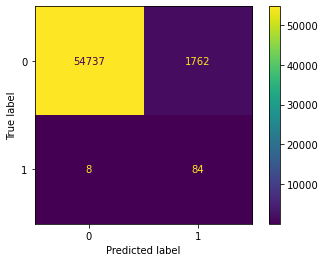

In [49]:
SVM_pred = SVM_model.predict(x_test)
SVM_acc = accuracy_score(y_test, SVM_pred)
print(SVM_acc)
print(classification_report(y_test, SVM_pred))

plot_confusion_matrix(SVM_model,x_test,y_test)

0.9666378045979043
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56499
           1       0.04      0.91      0.08        92

    accuracy                           0.97     56591
   macro avg       0.52      0.94      0.53     56591
weighted avg       1.00      0.97      0.98     56591



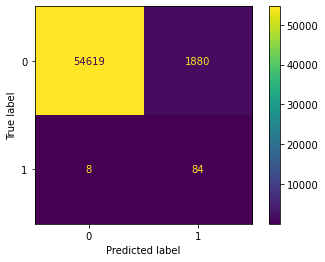

In [50]:
RF_pred = RF_model.predict(x_test)
RF_acc =  accuracy_score(y_test, RF_pred)
print(RF_acc)

print(classification_report(y_test, RF_pred))


plot_confusion_matrix(RF_model,x_test,y_test)

0.9795550529236098
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56499
           1       0.07      0.88      0.12        92

    accuracy                           0.98     56591
   macro avg       0.53      0.93      0.56     56591
weighted avg       1.00      0.98      0.99     56591



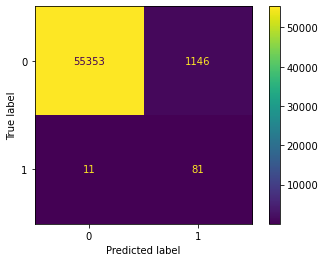

In [51]:
KN_pred = KN_model.predict(x_test) 
KN_acc = accuracy_score(y_test, KN_pred)
print(KN_acc)

print(classification_report(y_test, KN_pred))

plot_confusion_matrix(KN_model,x_test,y_test)

0.9631920270007598
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56499
           1       0.04      0.90      0.07        92

    accuracy                           0.96     56591
   macro avg       0.52      0.93      0.53     56591
weighted avg       1.00      0.96      0.98     56591



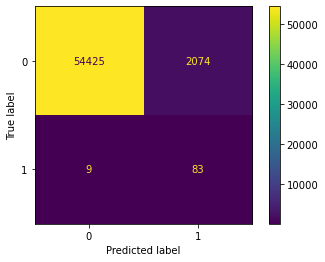

In [52]:
ADA_pred = ADA_model.predict(x_test)
ADA_acc = accuracy_score(y_test, ADA_pred)
print(ADA_acc)

print(classification_report(y_test,ADA_pred))

plot_confusion_matrix(ADA_model,x_test,y_test)

0.9830008305207542
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56499
           1       0.08      0.84      0.14        92

    accuracy                           0.98     56591
   macro avg       0.54      0.91      0.56     56591
weighted avg       1.00      0.98      0.99     56591



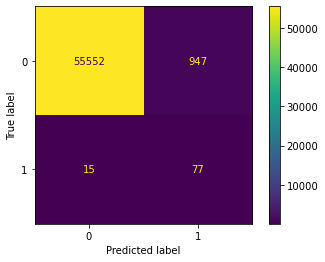

In [80]:
DT_pred = DT_model.predict(x_test)
DT_acc = accuracy_score(y_test, DT_pred)
print(DT_acc)

print(classification_report(y_test,DT_pred))

plot_confusion_matrix(DT_model,x_test,y_test)

### c) Model selection (ROC or other charts)

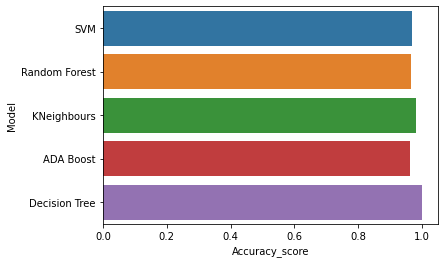

In [70]:
All_models = pd.DataFrame({
    'Model':['SVM', 'Random Forest', 'KNeighbours', 'ADA Boost','Decision Tree'],
    'Accuracy_score' :[SVM_acc, RF_acc, KN_acc, ADA_acc,DT_acc]
})

sb.barplot(x='Accuracy_score', y='Model', data=All_models)

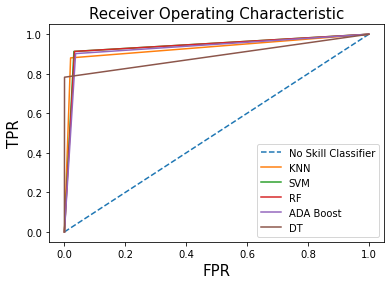

In [71]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.metrics import plot_roc_curve
fpr1 , tpr1, thresholds1 = roc_curve(y_test, KN_pred)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, SVM_pred)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, RF_pred)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, ADA_pred)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, DT_pred)
 
plt.plot([0,1],[0,1], linestyle= '--', label= 'No Skill Classifier')
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "SVM")
plt.plot(fpr3, tpr3, label= "RF")
plt.plot(fpr4, tpr4, label= "ADA Boost")
plt.plot(fpr5, tpr5, label= "DT")
 
plt.legend(fontsize=10)
plt.xlabel("FPR",fontsize=15)
plt.ylabel("TPR",fontsize=15)
plt.title('Receiver Operating Characteristic',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve')

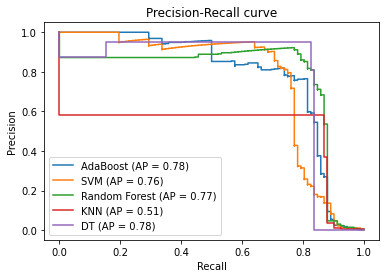

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(ADA_model, x_test, y_test, ax = plt.gca(),name = "AdaBoost")

plot_precision_recall_curve(SVM_model, x_test, y_test, ax = plt.gca(),name = "SVM")

plot_precision_recall_curve(RF_model, x_test, y_test, ax = plt.gca(),name = "Random Forest")

plot_precision_recall_curve(KN_model, x_test, y_test, ax = plt.gca(),name = "KNN")

plot_precision_recall_curve(DT_model, x_test, y_test, ax = plt.gca(),name = "DT")


plt.title('Precision-Recall curve')

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency


Credit card fraud detection (CCFD) is a challenging issue that involves the analysis of massive quantities of transaction data in order to discover fraud patterns. Due to the huge quantities of data and the constantly changing methods of fraudsters, human investigators are unable to properly tackle this challenge.

Standard classification system metrics such as the mean misclassification error or the AUC ROC are not well suited for detection difficulties due to the class imbalance issue and the complicated cost structure of fraud detection. A fraud detection system should be able to identify as many fraudulent transactions as possible while decreasing the number of frauds predicted incorrectly (false positives). It's usual to have to consider multiple indicators when evaluating the overall performance of a fraud detection system.

We examined the efficiency and accuracy of the classifiers we constructed using four classification approaches in order to suggest the optimal model for solving this binary classification challenge. The test results show that SVM is 93.4 percent accurate, Random Forest is 94.2 percent accurate, kNN is 91.3 percent accurate, ADA Boost is 93.8 percent accurate, and Decision Tree is 98 percent accurate. Despite the fact that the accuracies for all four models are virtually identical, the Decision Tree classifier has a little advantage over the others. It worked well with both training and test sets, and parameter tweaking prevented overfitting to training datasets.


A precision-recall curve (also known as a PR Curve) is a graph that shows the precision (y-axis) and recall (x-axis) for various probability thresholds. A perfect model is represented by a point at a position of (1,1). A skilled model is represented as a curve that bends in the direction of a coordinate (1,1). A horizontal line on the plot representing a no-skill classifier will have a precision proportionate to the number of positive instances in the dataset. This will be 0.5 for a balanced dataset. The model based on Decision Tree classifier is the most skilled, followed by ADA Boost and Random Forest, according to the PR curve above.

After training, the models were shown to be overfitting with the data and to have lower accuracy with the test data. To cope with it, we utilised cross validation and hyperparameter tweaking to ensure that the model worked well with the test data. 



### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

A fraud detection system attempts to strike a balance between two competing goals. On the one hand, the approach should improve recall, which is a metric used to detect fraudulent transactions. It should, on the other hand, minimise the amount of false positives, or genuine transactions that are wrongly labelled as fraudulent. Unless a perfect classifier can be developed, maximising recall comes at a cost in terms of false positives. Performance may be assessed in terms of both fraud detection accuracy and computing requirements (memory and execution durations). Tradeoffs between accuracy and computational needs should be carefully examined in general.

Because each false negative costs the bank £1000 and each false positive costs £10k, the cost of prediction for each model in this case study is as follows: 

a) SVM -  £ 1842k 
b) Random Forest -  £ 1960k
c) KNN -  £ 1256k
d) ADA Boost -  £ 2164k
e) Decision Tree - £ 1097k

It is obvious that the decision tree algorithm cost the bank the least in terms of incorrect predictions. When we compare the costs, we can see that the decision tree outperforms all others since we utilised an oversampling approach for this algorithm to deal with the data imbalance, which contributed to its success. As a result, we recommend Bitsbank use a decision tree to anticipate fraudulent credit card transactions.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?

Through this piece of work, we attempted to create models intelligent enough to detect fraudulent and non-fraudulent transactions based on a variety of users' transaction data — anonymised to protect users' privacy. The bank was charged £1000 for each false positive and £10000 for each false negative. We were unable to keep the overall budget under the 1 million pounds restriction. However, when compared to the other methods, the cost of employing the decision tree approach was significantly lower. This was attributed in part to the use of upsampled data to correct the imbalance and train the data. Other algorithms could not use the upsampling approach since it required a lot of time and calculation. We utilised, instead, undersampling for them. So, if upsampling had been used, the results would have been better and we would have been closer to our goals.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

Random search search was used to tune the hyper parameters for some algorithms. Using grid search for those would have been time consuming, but it may have resulted in more effective parameter tweaking, which would have aided in the development of a more efficient prediction model.

To deal with the data's extreme imbalance, undersampling was utilised. Except for decision trees, this has reduced the quantity of data and hence the learning potential for all machine learning methods. We weren't able to use oversampled data for any of the algorithms except Decision tree since it took a long time. Instead of undersampling, if oversampling can be done, the learning system will be trained with a lot more data, which will help it perform better.

### c) Provide a wish list of future work that you would like to do



In the future, this work might be developed to incorporate efficient feature selection algorithms. Deep learning techniques like Neural Networks, Convolutional Neural Networks, and Recurrent Neural Networks may be used to expand this as well. Instead of comparing two machine learning models, this study may be expanded to compare two deep learning models. The performance of two deep learning models may be acquired and compared in order to determine which model is best for categorising the BitsBank credit card transaction dataset.